In [231]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

KeyboardInterrupt: 

Unused or unrecognized kwargs: padding.


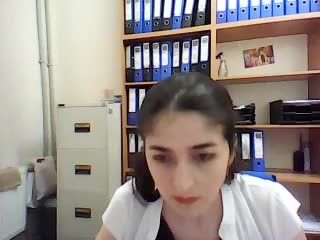

In [ ]:
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt
import cv2

# url = "https://unsplash.com/photos/8Nc_oQsc2qQ/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjcxMjAwNzI0&force=true&w=640"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/home/ajeet/codework/imposter_testing/2529597/onboarding/scans_1.jpg")
# image = Image.open("/tmp/video_incident_previews_ajeet/2597216_-2/temp_images/6_477.jpg")
# image = Image.open("/home/ajeet/codework/imposter_testing/cropped_1_2_resized.jpg")
# image

prompts = ["person", "face"]
inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
# predict
with torch.no_grad():
  outputs = model(**inputs)
preds = outputs.logits.unsqueeze(1)
image

Number of pixels with value 255: 91098


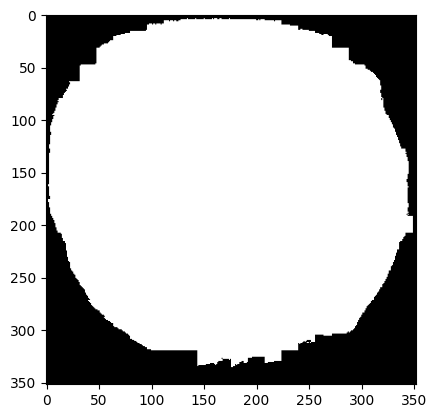

In [ ]:
# import matplotlib.pyplot as plt
# _, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
# [a.axis('off') for a in ax.flatten()]
# ax[0].imshow(image)
# [ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
# [ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];

filename = f"mask.png"
# here we save the second mask
plt.imsave(filename,torch.sigmoid(preds[1][0]))
img2 = cv2.imread(filename)
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)
# Image.fromarray(bw_image)
plt.imshow(bw_image, cmap='gray')
count_255 = cv2.countNonZero(bw_image)

print(f"Number of pixels with value 255: {count_255}")

In [ ]:
tensor = torch.sigmoid(preds[0][0])

print(torch.max(tensor.flatten()) , torch.min(tensor.flatten()) )
count_nonzero = torch.sum(tensor > 0.8).item()
print(count_nonzero)

tensor = torch.sigmoid(preds[1][0])

print(torch.max(tensor.flatten()) , torch.min(tensor.flatten()))
count_nonzero = torch.sum(tensor > 0.8).item()
count_nonzero

tensor(0.8818) tensor(0.0057)
79219
tensor(0.9273) tensor(0.0006)


63497

Number of pixels with value 255: 20082
tensor(0.0173) tensor(1.7660e-05)
0


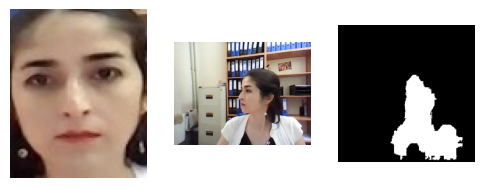

In [ ]:
image = Image.open("/home/ajeet/codework/imposter_testing/2529597/onboarding/scans_7.jpg")

# prompt = Image.open("/home/ajeet/codework/imposter_testing/cropped_2.jpg")
prompt = Image.open("/home/ajeet/codework/imposter_testing/cropped_1_2_resized.jpg")



encoded_image = processor(images=[image], return_tensors="pt")
encoded_prompt = processor(images=[prompt], return_tensors="pt")
# predict
with torch.no_grad():
  outputs = model(**encoded_image, conditional_pixel_values=encoded_prompt.pixel_values)
preds = outputs.logits.unsqueeze(1)
# preds = torch.transpose(preds, 0, 1)

# _, ax = plt.subplots(1, 2, figsize=(6, 4))
# [a.axis('off') for a in ax.flatten()]
# ax[0].imshow(image)
# preds_sigmoid = torch.sigmoid(preds[0][0])

# # Set values less than 0 to 0
# preds_sigmoid[preds_sigmoid < 0.60] = 0
# ax[1].imshow(preds_sigmoid)


_, ax = plt.subplots(1, 3, figsize=(6, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(prompt)
ax[1].imshow(image)

filename = f"prompt_mask.png"
# here we save the second mask
plt.imsave(filename,torch.sigmoid(preds[0][0]))
img2 = cv2.imread(filename)
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)
ax[2].imshow(bw_image, cmap='gray')
# Image.fromarray(bw_image)
count_255 = cv2.countNonZero(bw_image)

print(f"Number of pixels with value 255: {count_255}")

tensor = torch.sigmoid(preds[0][0])

print(torch.max(tensor.flatten()) , torch.min(tensor.flatten()) )
count_nonzero = torch.sum(tensor > 0.8).item()
print(count_nonzero)

In [ ]:
count_255 = cv2.countNonZero(bw_image)

print(f"Number of pixels with value 255: {count_255}")

Number of pixels with value 255: 12406


In [ ]:
tensor = torch.sigmoid(preds[0][0])

print(torch.max(tensor.flatten()) , torch.min(tensor.flatten()) )
count_nonzero = torch.sum(tensor > 0.6).item()
count_nonzero

tensor(0.3471) tensor(0.0010)


0

In [ ]:
import cv2

# Read the image
image = cv2.imread('/home/ajeet/codework/imposter_testing/cropped_6.jpg')

# Define the new dimensions (width, height)
new_dimensions = (85, 105)

# Resize the image
resized_image = cv2.resize(image, new_dimensions)

# Save or display the resized image
cv2.imwrite('/home/ajeet/codework/imposter_testing/cropped_6_resized.jpg', resized_image)
cv2.imshow('Resized Image', resized_image)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os
import numpy as np

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

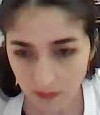

In [ ]:
image1 = Image.open("/home/ajeet/codework/imposter_testing/cropped_1.jpg")

inputs = processor(images=image1, return_tensors="pt")
with torch.no_grad():
    outputs = model.get_image_features(**inputs)

embeddings1 = outputs
image1

In [ ]:
files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]
files

['/home/ajeet/codework/imposter_pics/2616852.jpg',
 '/home/ajeet/codework/imposter_pics/2596579.jpg',
 '/home/ajeet/codework/imposter_pics/2546264.jpg',
 '/home/ajeet/codework/imposter_pics/2602597.jpg',
 '/home/ajeet/codework/imposter_pics/2529597.jpg',
 '/home/ajeet/codework/imposter_pics/2597081.jpg',
 '/home/ajeet/codework/imposter_pics/2599189.jpg',
 '/home/ajeet/codework/imposter_pics/2598363.jpg',
 '/home/ajeet/codework/imposter_pics/2603014.jpg',
 '/home/ajeet/codework/imposter_pics/2599372.jpg',
 '/home/ajeet/codework/imposter_pics/cropped_4_resized.jpg',
 '/home/ajeet/codework/imposter_pics/cropped_2_resized.jpg',
 '/home/ajeet/codework/imposter_pics/cropped_5_resized.jpg',
 '/home/ajeet/codework/imposter_pics/2529909.jpg',
 '/home/ajeet/codework/imposter_pics/cropped_1.jpg',
 '/home/ajeet/codework/imposter_pics/2538482.jpg',
 '/home/ajeet/codework/imposter_pics/cropped_3_resized.jpg',
 '/home/ajeet/codework/imposter_pics/2597216.jpg',
 '/home/ajeet/codework/imposter_pics/259

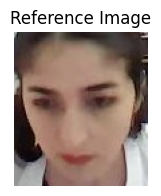

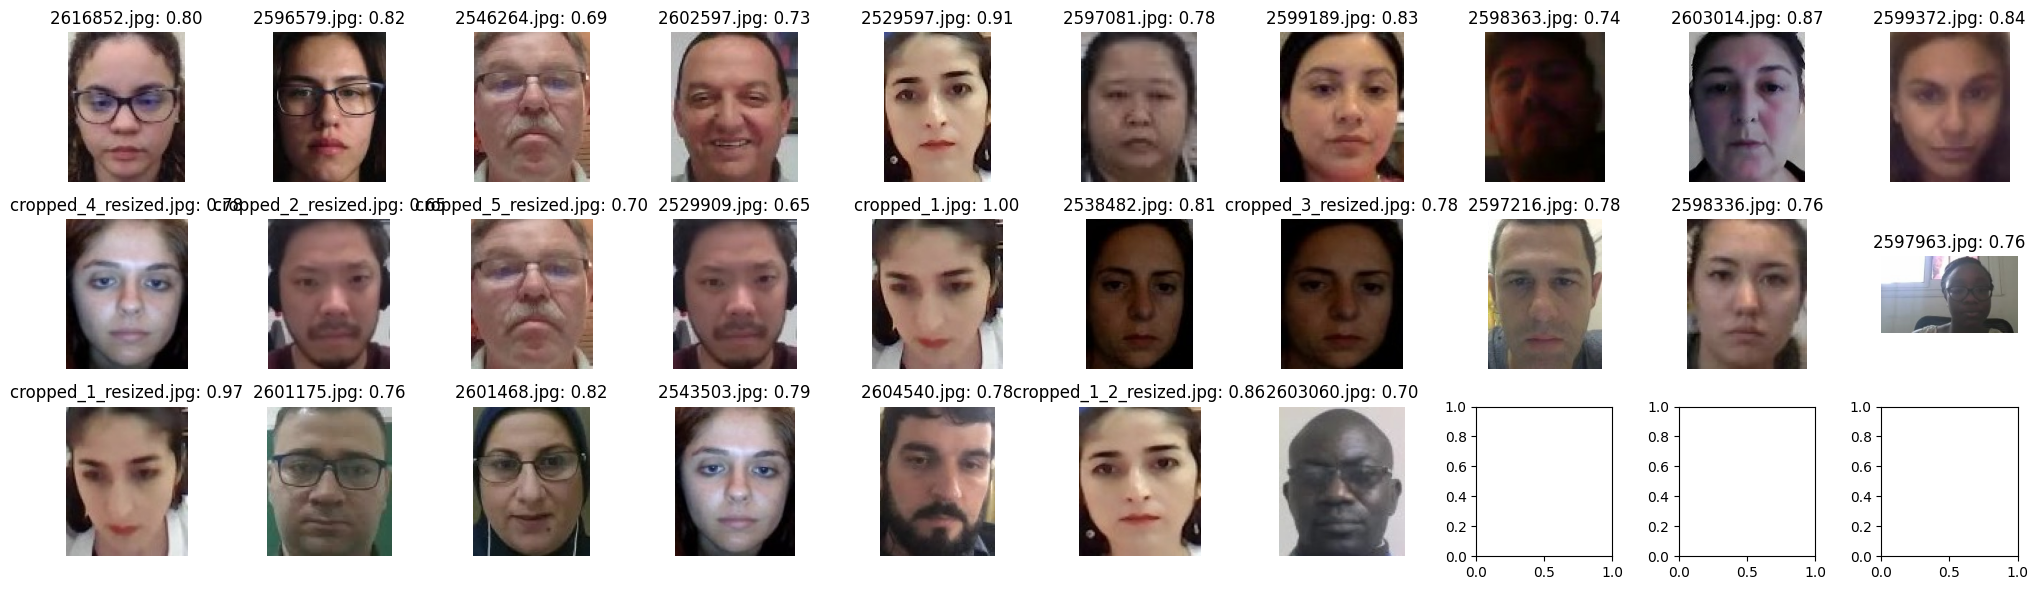

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import math


image1 = Image.open("/home/ajeet/codework/imposter_testing/cropped_1.jpg")

inputs = processor(images=image1, return_tensors="pt")
with torch.no_grad():
    outputs = model.get_image_features(**inputs)

embeddings1 = outputs

plt.figure(figsize=(2, 2))
plt.imshow(image1)
plt.title("Reference Image")
plt.axis('off')
plt.show()


num_images = len(files)
num_columns = 10
num_rows = math.ceil(num_images / num_columns)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 2))


for idx, file in enumerate(files):
    image2 = Image.open(file)
    # 

    inputs = processor(images=image2, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)

    embeddings2 = outputs

    similarity = cosine_similarity(embeddings1, embeddings2)[0, 0]
    # print("cosine_similarity: ", similarity)

    row = idx // num_columns
    col = idx % num_columns

    axs[row, col].imshow(image2)
    filename = os.path.basename(file)
    axs[row, col].set_title(f"{filename}: {similarity:.2f}")
    axs[row, col].axis('off')

# # Hide any remaining empty subplots
# for i in range(len(files) + 1, len(axes)):
#     axes[i].axis('off')

# Adjust layout to make sure titles and images are properly aligned
plt.tight_layout()
plt.show()

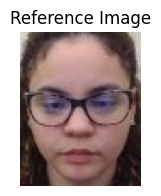

second_max: ('/home/ajeet/codework/imposter_testing/2616852_2.jpg', 0.85733426)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

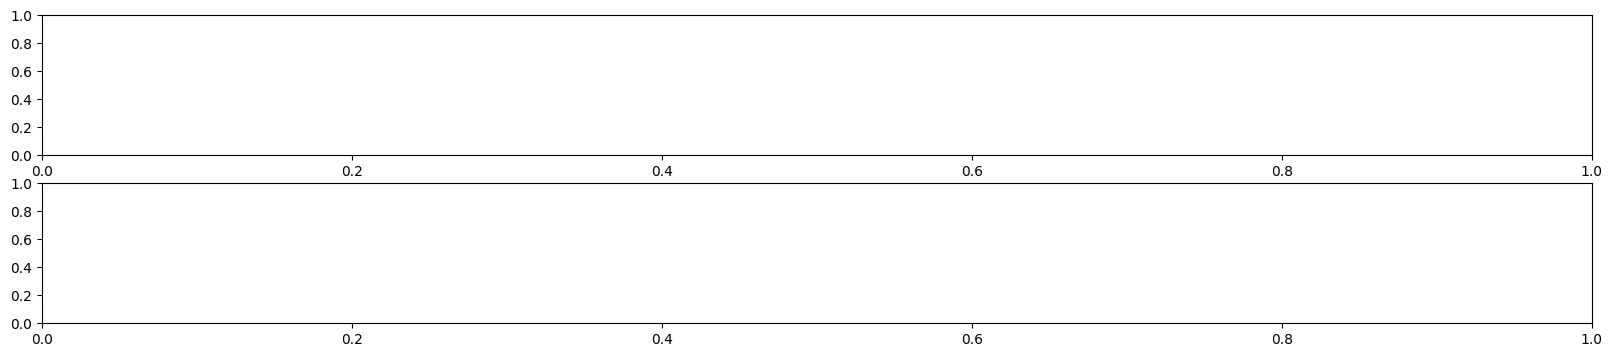

In [235]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math
import os

def imposter_cosine(image1, files):
    image1 = Image.open(image1)

    # Process and get embeddings for the first image
    inputs = processor(images=image1, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    embeddings1 = outputs

    plt.figure(figsize=(2, 2))
    plt.imshow(image1)
    plt.title("Reference Image")
    plt.axis('off')
    plt.show()


    # List to store file names and their cosine similarities
    similarities = []

    # Calculate cosine similarity for each image and store it with the file name
    for file in files:
        image2 = Image.open(file)
        inputs = processor(images=image2, return_tensors="pt")
        with torch.no_grad():
            outputs = model.get_image_features(**inputs)
        embeddings2 = outputs

        similarity = cosine_similarity(embeddings1, embeddings2)[0, 0]  # Extract scalar value
        similarities.append((file, similarity))

    # Sort images by cosine similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    print("second_max:", similarities[1])

    num_images = len(similarities)
    num_columns = 10
    num_rows = math.ceil(num_images / num_columns)

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 2))

    for idx, (file, similarity) in enumerate(similarities):
        image2 = Image.open(file)
        row = idx // num_columns
        col = idx % num_columns

        axs[row, col].imshow(image2)
        filename = os.path.basename(file)
        axs[row, col].set_title(f"{filename}: {similarity:.2f}", fontsize=8)
        axs[row, col].axis('off')

    # Hide empty subplots if the total number of images is not a multiple of num_columns
    for i in range(num_images, num_rows * num_columns):
        axs.flat[i].axis('off')

    plt.tight_layout()
    plt.show()

# files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]
# imposter_cosine("/home/ajeet/codework/imposter_testing/cropped_1.jpg", files)
files = [
    "/home/ajeet/codework/imposter_testing/2616852_1.jpg",
    "/home/ajeet/codework/imposter_testing/2616852_2.jpg"
]
imposter_cosine("/home/ajeet/codework/imposter_testing/2616852.jpg", files)

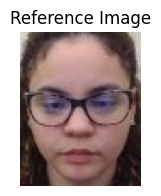

second_max: ('/home/ajeet/codework/imposter_testing/2616852_2.jpg', 0.85733426)


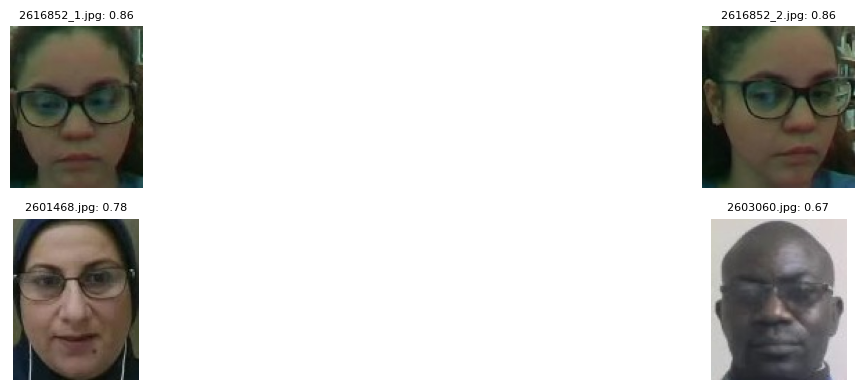

In [236]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math
import os

def imposter_cosine(image1, files):
    image1 = Image.open(image1)

    # Process and get embeddings for the first image
    inputs = processor(images=image1, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    embeddings1 = outputs

    plt.figure(figsize=(2, 2))
    plt.imshow(image1)
    plt.title("Reference Image")
    plt.axis('off')
    plt.show()


    # List to store file names and their cosine similarities
    similarities = []

    # Calculate cosine similarity for each image and store it with the file name
    for file in files:
        image2 = Image.open(file)
        inputs = processor(images=image2, return_tensors="pt")
        with torch.no_grad():
            outputs = model.get_image_features(**inputs)
        embeddings2 = outputs

        similarity = cosine_similarity(embeddings1, embeddings2)[0, 0]  # Extract scalar value
        similarities.append((file, similarity))

    # Sort images by cosine similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    print("second_max:", similarities[1])

    num_images = len(similarities)
    num_columns = 2
    num_rows = math.ceil(num_images / num_columns)

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 2))

    for idx, (file, similarity) in enumerate(similarities):
        image2 = Image.open(file)
        row = idx // num_columns
        col = idx % num_columns

        axs[row, col].imshow(image2)
        filename = os.path.basename(file)
        axs[row, col].set_title(f"{filename}: {similarity:.2f}", fontsize=8)
        axs[row, col].axis('off')

    # Hide empty subplots if the total number of images is not a multiple of num_columns
    for i in range(num_images, num_rows * num_columns):
        axs.flat[i].axis('off')

    plt.tight_layout()
    plt.show()

# files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]
# imposter_cosine("/home/ajeet/codework/imposter_testing/cropped_1.jpg", files)
files = [
    "/home/ajeet/codework/imposter_testing/2616852_1.jpg",
    "/home/ajeet/codework/imposter_testing/2616852_2.jpg",
    "/home/ajeet/codework/imposter_testing/2601468.jpg",
    "/home/ajeet/codework/imposter_testing/2603060.jpg"
]
imposter_cosine("/home/ajeet/codework/imposter_testing/2616852.jpg", files)

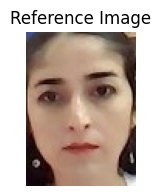

second_max: ('/home/ajeet/codework/imposter_testing_same/test/2529909.jpg', 0.735765)


In [258]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math
import os

def imposter_cosine(image1, files):
    image1 = Image.open(image1)

    # Process and get embeddings for the first image
    inputs = processor(images=image1, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    embeddings1 = outputs

    plt.figure(figsize=(2, 2))
    plt.imshow(image1)
    plt.title("Reference Image")
    plt.axis('off')
    plt.show()


    # List to store file names and their cosine similarities
    similarities = []

    # Calculate cosine similarity for each image and store it with the file name
    for file in files:
        image2 = Image.open(file)
        inputs = processor(images=image2, return_tensors="pt")
        with torch.no_grad():
            outputs = model.get_image_features(**inputs)
        embeddings2 = outputs

        similarity = cosine_similarity(embeddings1, embeddings2)[0, 0]  # Extract scalar value
        similarities.append((file, similarity))

    # Sort images by cosine similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    print("second_max:", similarities[0])

    # num_images = len(similarities)
    # num_columns = 2
    # num_rows = math.ceil(num_images / num_columns)

    # fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 2))

    # for idx, (file, similarity) in enumerate(similarities):
    #     image2 = Image.open(file)
    #     row = idx // num_columns
    #     col = idx % num_columns

    #     axs[row, col].imshow(image2)
    #     filename = os.path.basename(file)
    #     axs[row, col].set_title(f"{filename}: {similarity:.2f}", fontsize=8)
    #     axs[row, col].axis('off')

    # # Hide empty subplots if the total number of images is not a multiple of num_columns
    # for i in range(num_images, num_rows * num_columns):
    #     axs.flat[i].axis('off')

    # plt.tight_layout()
    # plt.show()

# files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]
# imposter_cosine("/home/ajeet/codework/imposter_testing/cropped_1.jpg", files)
files = [
    # "/home/ajeet/codework/imposter_testing_same/test/2529597_left_looking.jpg",
     "/home/ajeet/codework/imposter_testing_same/test/2529909.jpg",
]
imposter_cosine("/home/ajeet/codework/imposter_pics/2529597.jpg", files)

/tmp/ipykernel_257217/3769220870.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(10, 1 * 2))


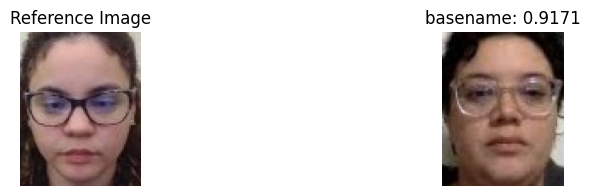

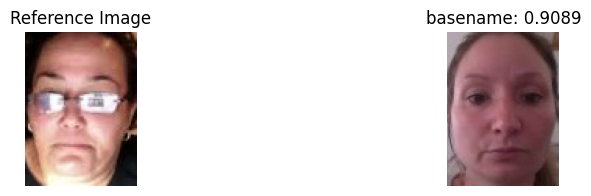

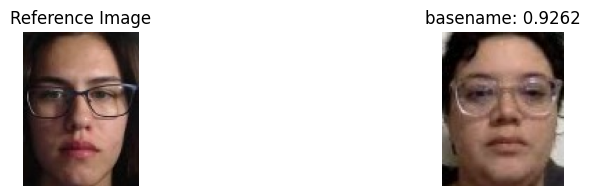

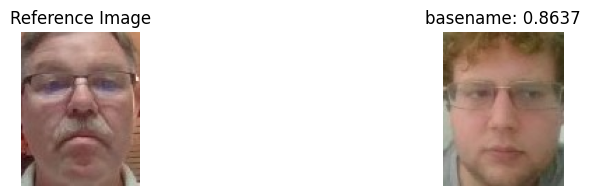

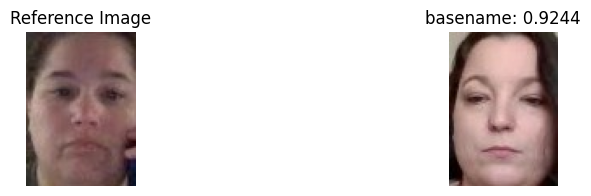

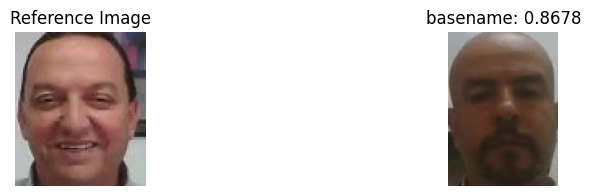

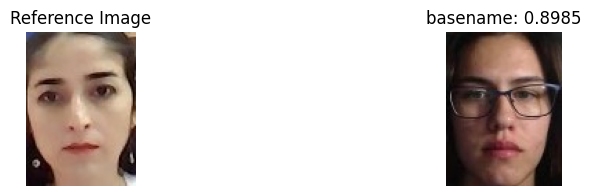

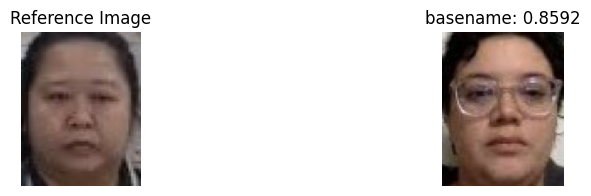

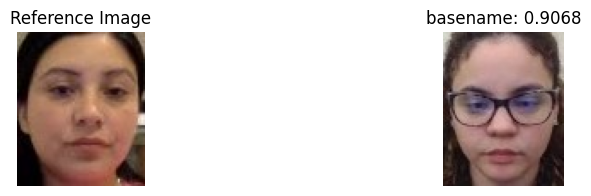

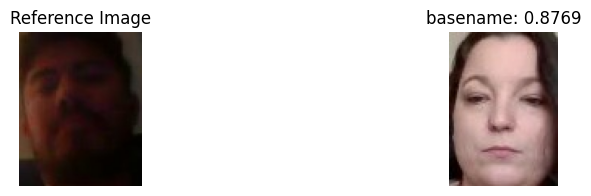

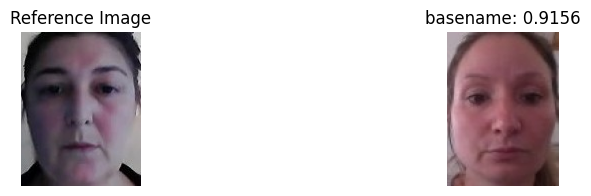

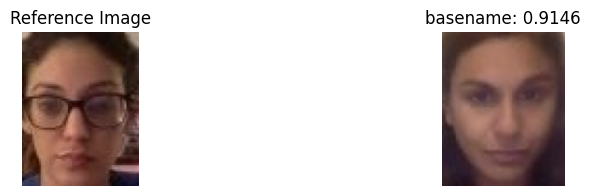

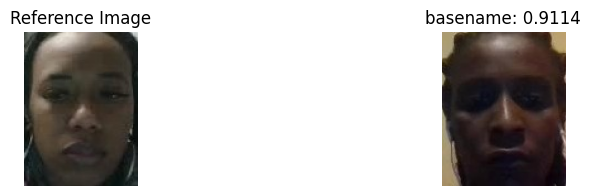

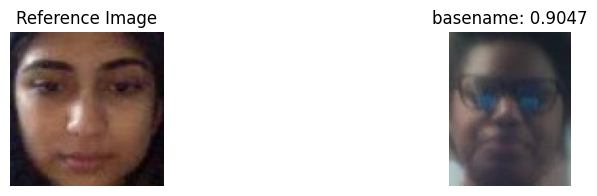

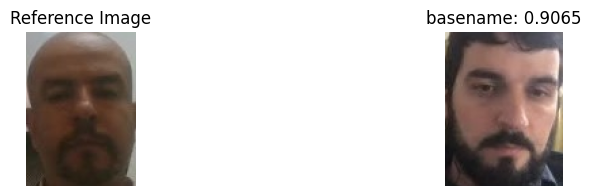

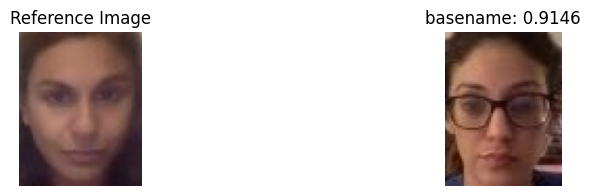

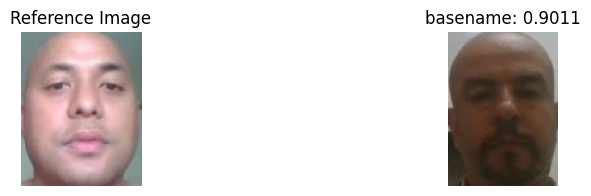

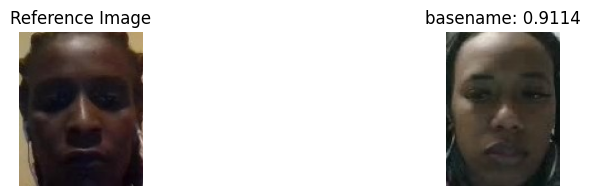

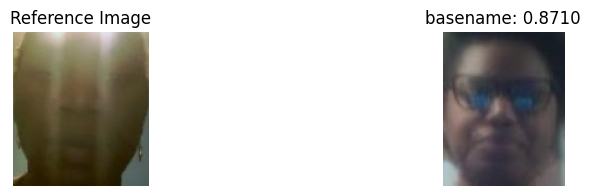

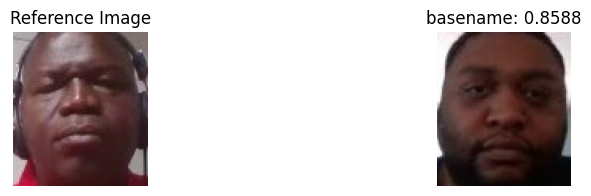

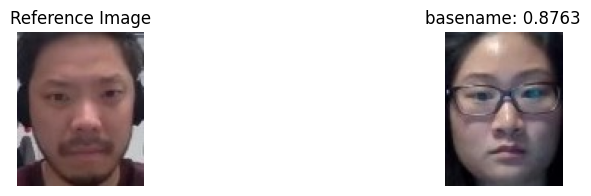

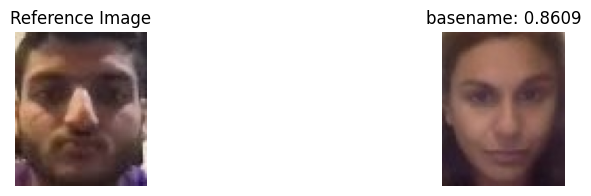

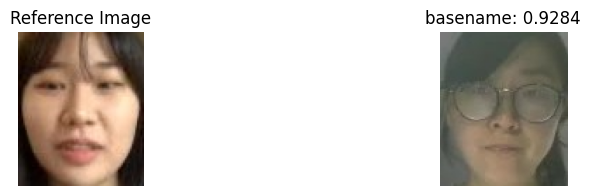

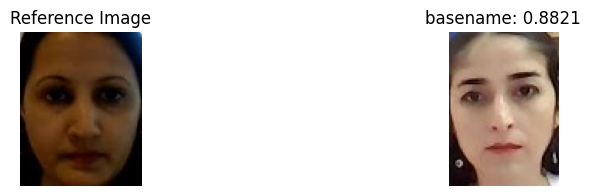

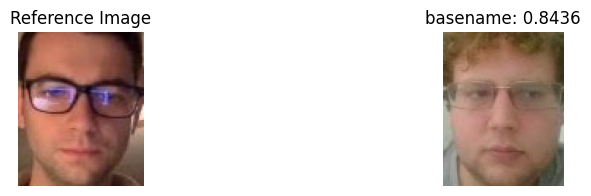

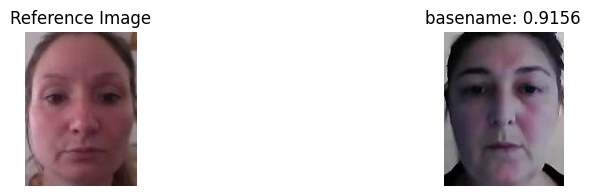

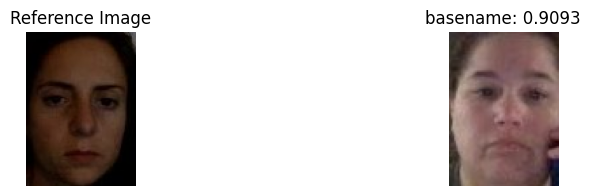

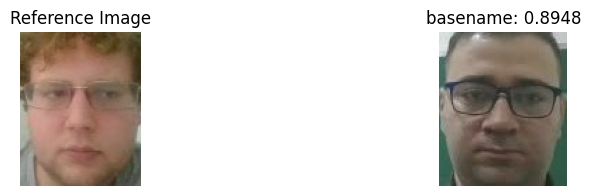

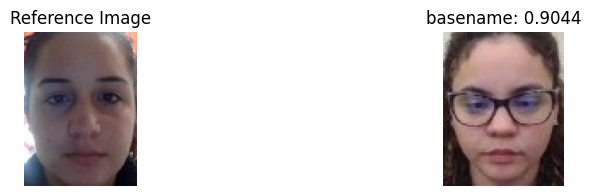

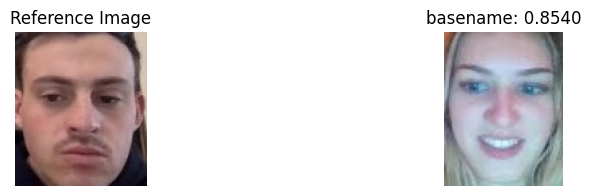

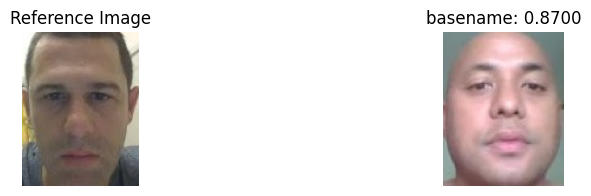

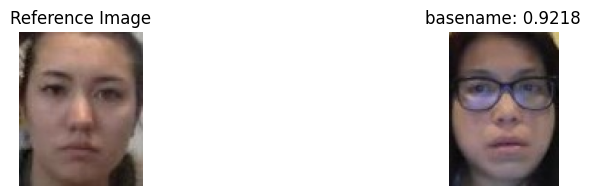

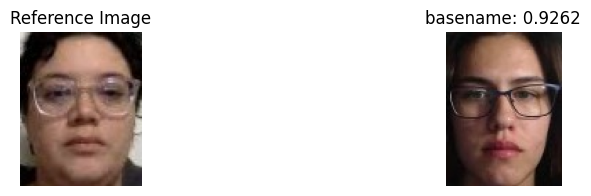

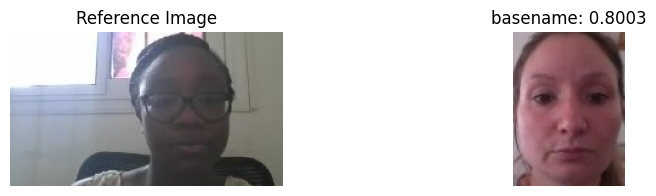

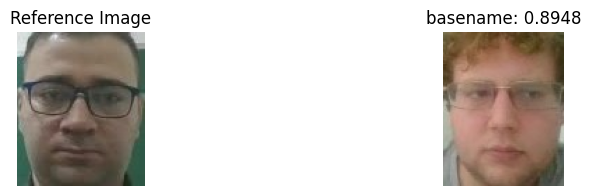

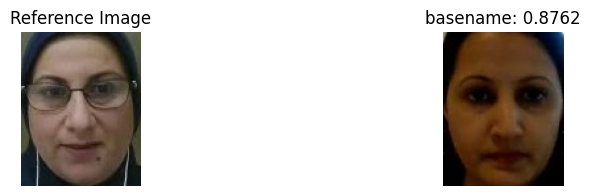

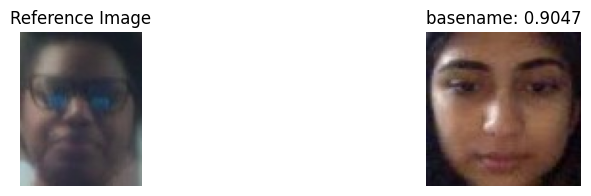

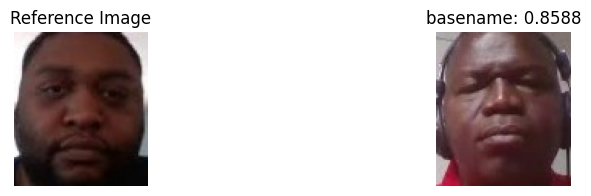

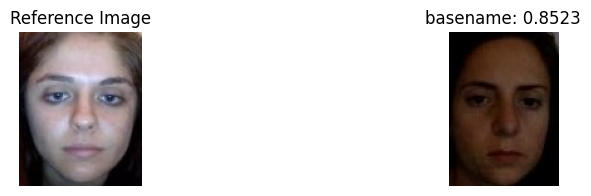

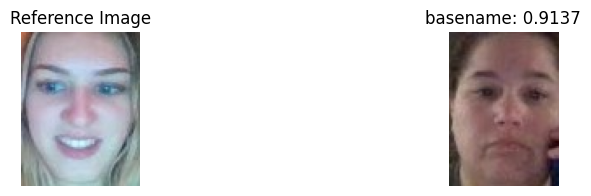

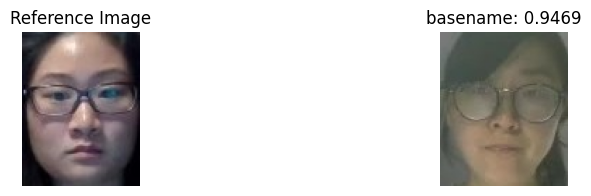

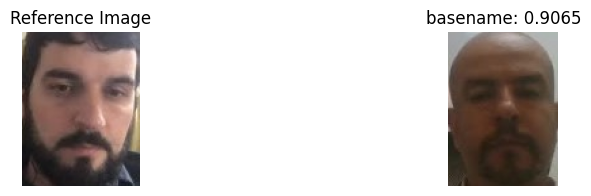

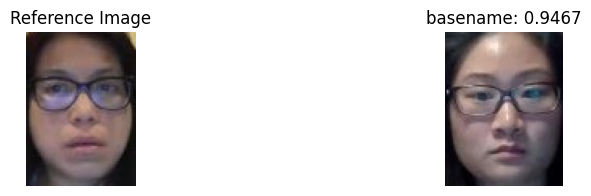

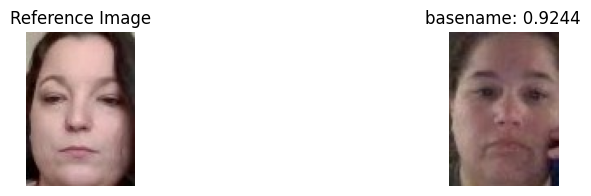

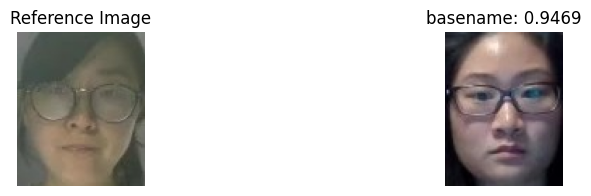

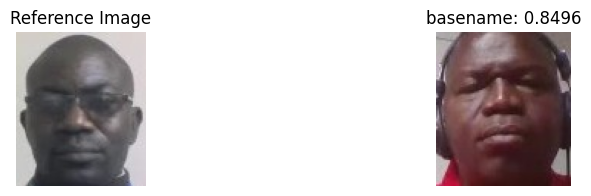

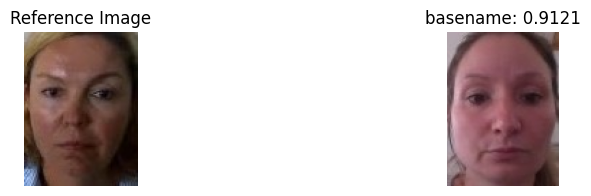

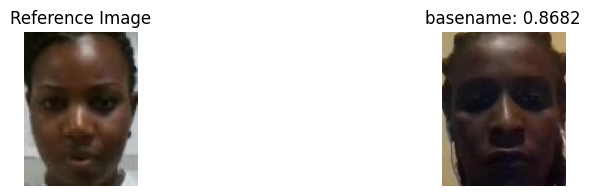

In [240]:
files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]

for file in files:
    imposter_cosine(file, files)

In [260]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math
import os

def imposter_cosine_print_only_number(image1, files):
    image1 = Image.open(image1)

    # Process and get embeddings for the first image
    inputs = processor(images=image1, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    embeddings1 = outputs

    # plt.figure(figsize=(2, 2))
    # plt.imshow(image1)
    # plt.title("Reference Image")
    # plt.axis('off')
    # plt.show()


    # List to store file names and their cosine similarities
    similarities = []

    # Calculate cosine similarity for each image and store it with the file name
    for file in files:
        image2 = Image.open(file)
        inputs = processor(images=image2, return_tensors="pt")
        with torch.no_grad():
            outputs = model.get_image_features(**inputs)
        embeddings2 = outputs

        similarity = cosine_similarity(embeddings1, embeddings2)[0, 0]
        similarities.append((file, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)

    similarity_values = [sim[1] for sim in similarities]
    rounded_values = list(map(lambda x: f"{x:.4f}", similarity_values))
    print(rounded_values)
    return(rounded_values)

files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]

for file in files:
    imposter_cosine_print_only_number(file, files)

['1.0000', '0.9171', '0.9068', '0.9044', '0.8932', '0.8755', '0.8736', '0.8707', '0.8684', '0.8586', '0.8546', '0.8511', '0.8503', '0.8448', '0.8420', '0.8413', '0.8397', '0.8332', '0.8332', '0.8321', '0.8259', '0.8234', '0.8198', '0.8197', '0.8190', '0.8148', '0.8133', '0.8083', '0.8016', '0.7930', '0.7928', '0.7898', '0.7861', '0.7778', '0.7752', '0.7702', '0.7616', '0.7507', '0.7487', '0.7477', '0.7442', '0.7415', '0.7282', '0.7266', '0.7223', '0.7165', '0.6823', '0.6716']
['1.0000', '0.9089', '0.8848', '0.8807', '0.8754', '0.8505', '0.8498', '0.8471', '0.8389', '0.8359', '0.8321', '0.8311', '0.8286', '0.8272', '0.8265', '0.8234', '0.8213', '0.8202', '0.8183', '0.8182', '0.8177', '0.8175', '0.8151', '0.8134', '0.8132', '0.8111', '0.8065', '0.8043', '0.8039', '0.8033', '0.8032', '0.7994', '0.7910', '0.7889', '0.7883', '0.7808', '0.7769', '0.7724', '0.7674', '0.7672', '0.7593', '0.7521', '0.7417', '0.7352', '0.7115', '0.6981', '0.6962', '0.6373']
['1.0000', '0.9262', '0.9228', '0.9089

In [261]:
files = [os.path.join("/tmp/aligned_faces/2547436" , file) for file in os.listdir("/tmp/aligned_faces/2547436")]

results = imposter_cosine_print_only_number("/home/ajeet/codework/imposter_pics/2547436.jpg", files)

['0.9448', '0.9441', '0.9422', '0.9398', '0.9393', '0.9390', '0.9388', '0.9385', '0.9385', '0.9370', '0.9366', '0.9359', '0.9354', '0.9353', '0.9353', '0.9352', '0.9352', '0.9348', '0.9348', '0.9348', '0.9347', '0.9346', '0.9345', '0.9345', '0.9342', '0.9341', '0.9340', '0.9340', '0.9340', '0.9339', '0.9339', '0.9339', '0.9333', '0.9330', '0.9327', '0.9326', '0.9325', '0.9325', '0.9325', '0.9325', '0.9324', '0.9323', '0.9323', '0.9322', '0.9322', '0.9321', '0.9318', '0.9317', '0.9317', '0.9315', '0.9314', '0.9314', '0.9313', '0.9312', '0.9311', '0.9311', '0.9310', '0.9310', '0.9309', '0.9309', '0.9309', '0.9309', '0.9308', '0.9308', '0.9308', '0.9307', '0.9305', '0.9304', '0.9304', '0.9304', '0.9303', '0.9302', '0.9302', '0.9302', '0.9300', '0.9299', '0.9299', '0.9298', '0.9298', '0.9298', '0.9297', '0.9297', '0.9296', '0.9296', '0.9295', '0.9295', '0.9295', '0.9293', '0.9292', '0.9291', '0.9291', '0.9291', '0.9290', '0.9289', '0.9289', '0.9289', '0.9288', '0.9288', '0.9288', '0.9287',

In [262]:
results

['0.9448',
 '0.9441',
 '0.9422',
 '0.9398',
 '0.9393',
 '0.9390',
 '0.9388',
 '0.9385',
 '0.9385',
 '0.9370',
 '0.9366',
 '0.9359',
 '0.9354',
 '0.9353',
 '0.9353',
 '0.9352',
 '0.9352',
 '0.9348',
 '0.9348',
 '0.9348',
 '0.9347',
 '0.9346',
 '0.9345',
 '0.9345',
 '0.9342',
 '0.9341',
 '0.9340',
 '0.9340',
 '0.9340',
 '0.9339',
 '0.9339',
 '0.9339',
 '0.9333',
 '0.9330',
 '0.9327',
 '0.9326',
 '0.9325',
 '0.9325',
 '0.9325',
 '0.9325',
 '0.9324',
 '0.9323',
 '0.9323',
 '0.9322',
 '0.9322',
 '0.9321',
 '0.9318',
 '0.9317',
 '0.9317',
 '0.9315',
 '0.9314',
 '0.9314',
 '0.9313',
 '0.9312',
 '0.9311',
 '0.9311',
 '0.9310',
 '0.9310',
 '0.9309',
 '0.9309',
 '0.9309',
 '0.9309',
 '0.9308',
 '0.9308',
 '0.9308',
 '0.9307',
 '0.9305',
 '0.9304',
 '0.9304',
 '0.9304',
 '0.9303',
 '0.9302',
 '0.9302',
 '0.9302',
 '0.9300',
 '0.9299',
 '0.9299',
 '0.9298',
 '0.9298',
 '0.9298',
 '0.9297',
 '0.9297',
 '0.9296',
 '0.9296',
 '0.9295',
 '0.9295',
 '0.9295',
 '0.9293',
 '0.9292',
 '0.9291',
 '0.9291',

In [267]:
results[0:500]

['0.9448',
 '0.9441',
 '0.9422',
 '0.9398',
 '0.9393',
 '0.9390',
 '0.9388',
 '0.9385',
 '0.9385',
 '0.9370',
 '0.9366',
 '0.9359',
 '0.9354',
 '0.9353',
 '0.9353',
 '0.9352',
 '0.9352',
 '0.9348',
 '0.9348',
 '0.9348',
 '0.9347',
 '0.9346',
 '0.9345',
 '0.9345',
 '0.9342',
 '0.9341',
 '0.9340',
 '0.9340',
 '0.9340',
 '0.9339',
 '0.9339',
 '0.9339',
 '0.9333',
 '0.9330',
 '0.9327',
 '0.9326',
 '0.9325',
 '0.9325',
 '0.9325',
 '0.9325',
 '0.9324',
 '0.9323',
 '0.9323',
 '0.9322',
 '0.9322',
 '0.9321',
 '0.9318',
 '0.9317',
 '0.9317',
 '0.9315',
 '0.9314',
 '0.9314',
 '0.9313',
 '0.9312',
 '0.9311',
 '0.9311',
 '0.9310',
 '0.9310',
 '0.9309',
 '0.9309',
 '0.9309',
 '0.9309',
 '0.9308',
 '0.9308',
 '0.9308',
 '0.9307',
 '0.9305',
 '0.9304',
 '0.9304',
 '0.9304',
 '0.9303',
 '0.9302',
 '0.9302',
 '0.9302',
 '0.9300',
 '0.9299',
 '0.9299',
 '0.9298',
 '0.9298',
 '0.9298',
 '0.9297',
 '0.9297',
 '0.9296',
 '0.9296',
 '0.9295',
 '0.9295',
 '0.9295',
 '0.9293',
 '0.9292',
 '0.9291',
 '0.9291',

In [272]:
float((results[0]))

0.9448

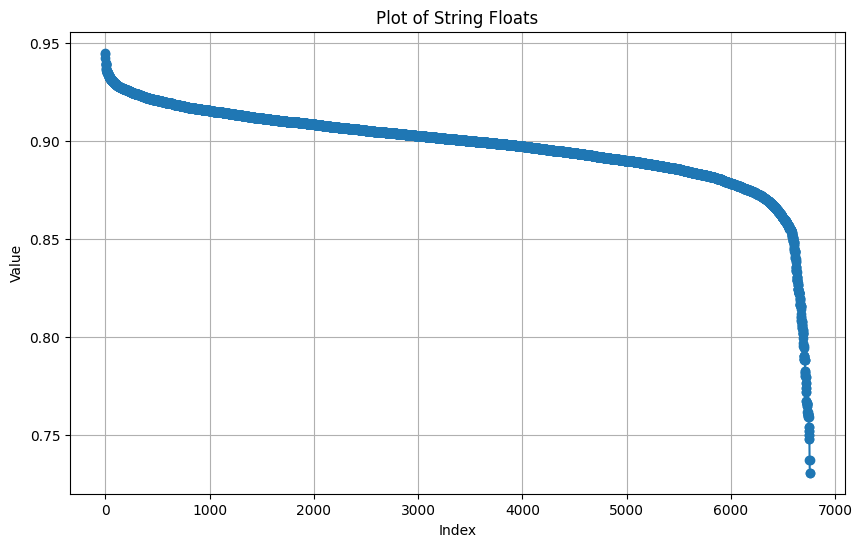

In [276]:
# Convert string floats to actual floats
float_values = [float(value) for value in results]

# Create an index for the x-axis (e.g., 0, 1, 2, ..., 499)
x_values = list(range(len(float_values)))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, float_values, marker='o')  # You can change the plot type here (e.g., scatter)
plt.title("Plot of String Floats")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

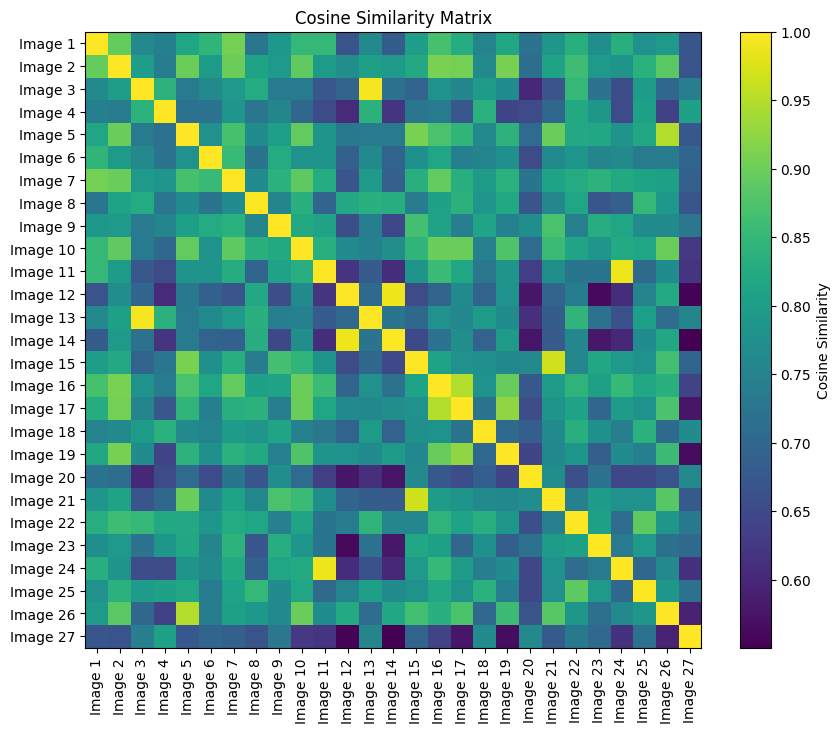

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

def plot_cosine_similarity(files):
    num_images = len(files)
    similarity_matrix = np.zeros((num_images, num_images))
    embeddings = []

    # Process and get embeddings for all images
    for file in files:
        image = Image.open(file)
        inputs = processor(images=image, return_tensors="pt")
        with torch.no_grad():
            outputs = model.get_image_features(**inputs)
        embeddings.append(outputs)

    # Calculate cosine similarity for each pair of images
    for i in range(num_images):
        for j in range(num_images):
            similarity = cosine_similarity(embeddings[i], embeddings[j])[0, 0]
            similarity_matrix[i, j] = similarity

    # Plot the similarity matrix as a heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.xticks(ticks=np.arange(num_images), labels=[f"Image {i+1}" for i in range(num_images)], rotation=90)
    plt.yticks(ticks=np.arange(num_images), labels=[f"Image {i+1}" for i in range(num_images)])
    plt.title('Cosine Similarity Matrix')
    plt.show()

files = [os.path.join("/home/ajeet/codework/imposter_pics" , file) for file in os.listdir("/home/ajeet/codework/imposter_pics")]

plot_cosine_similarity(files)


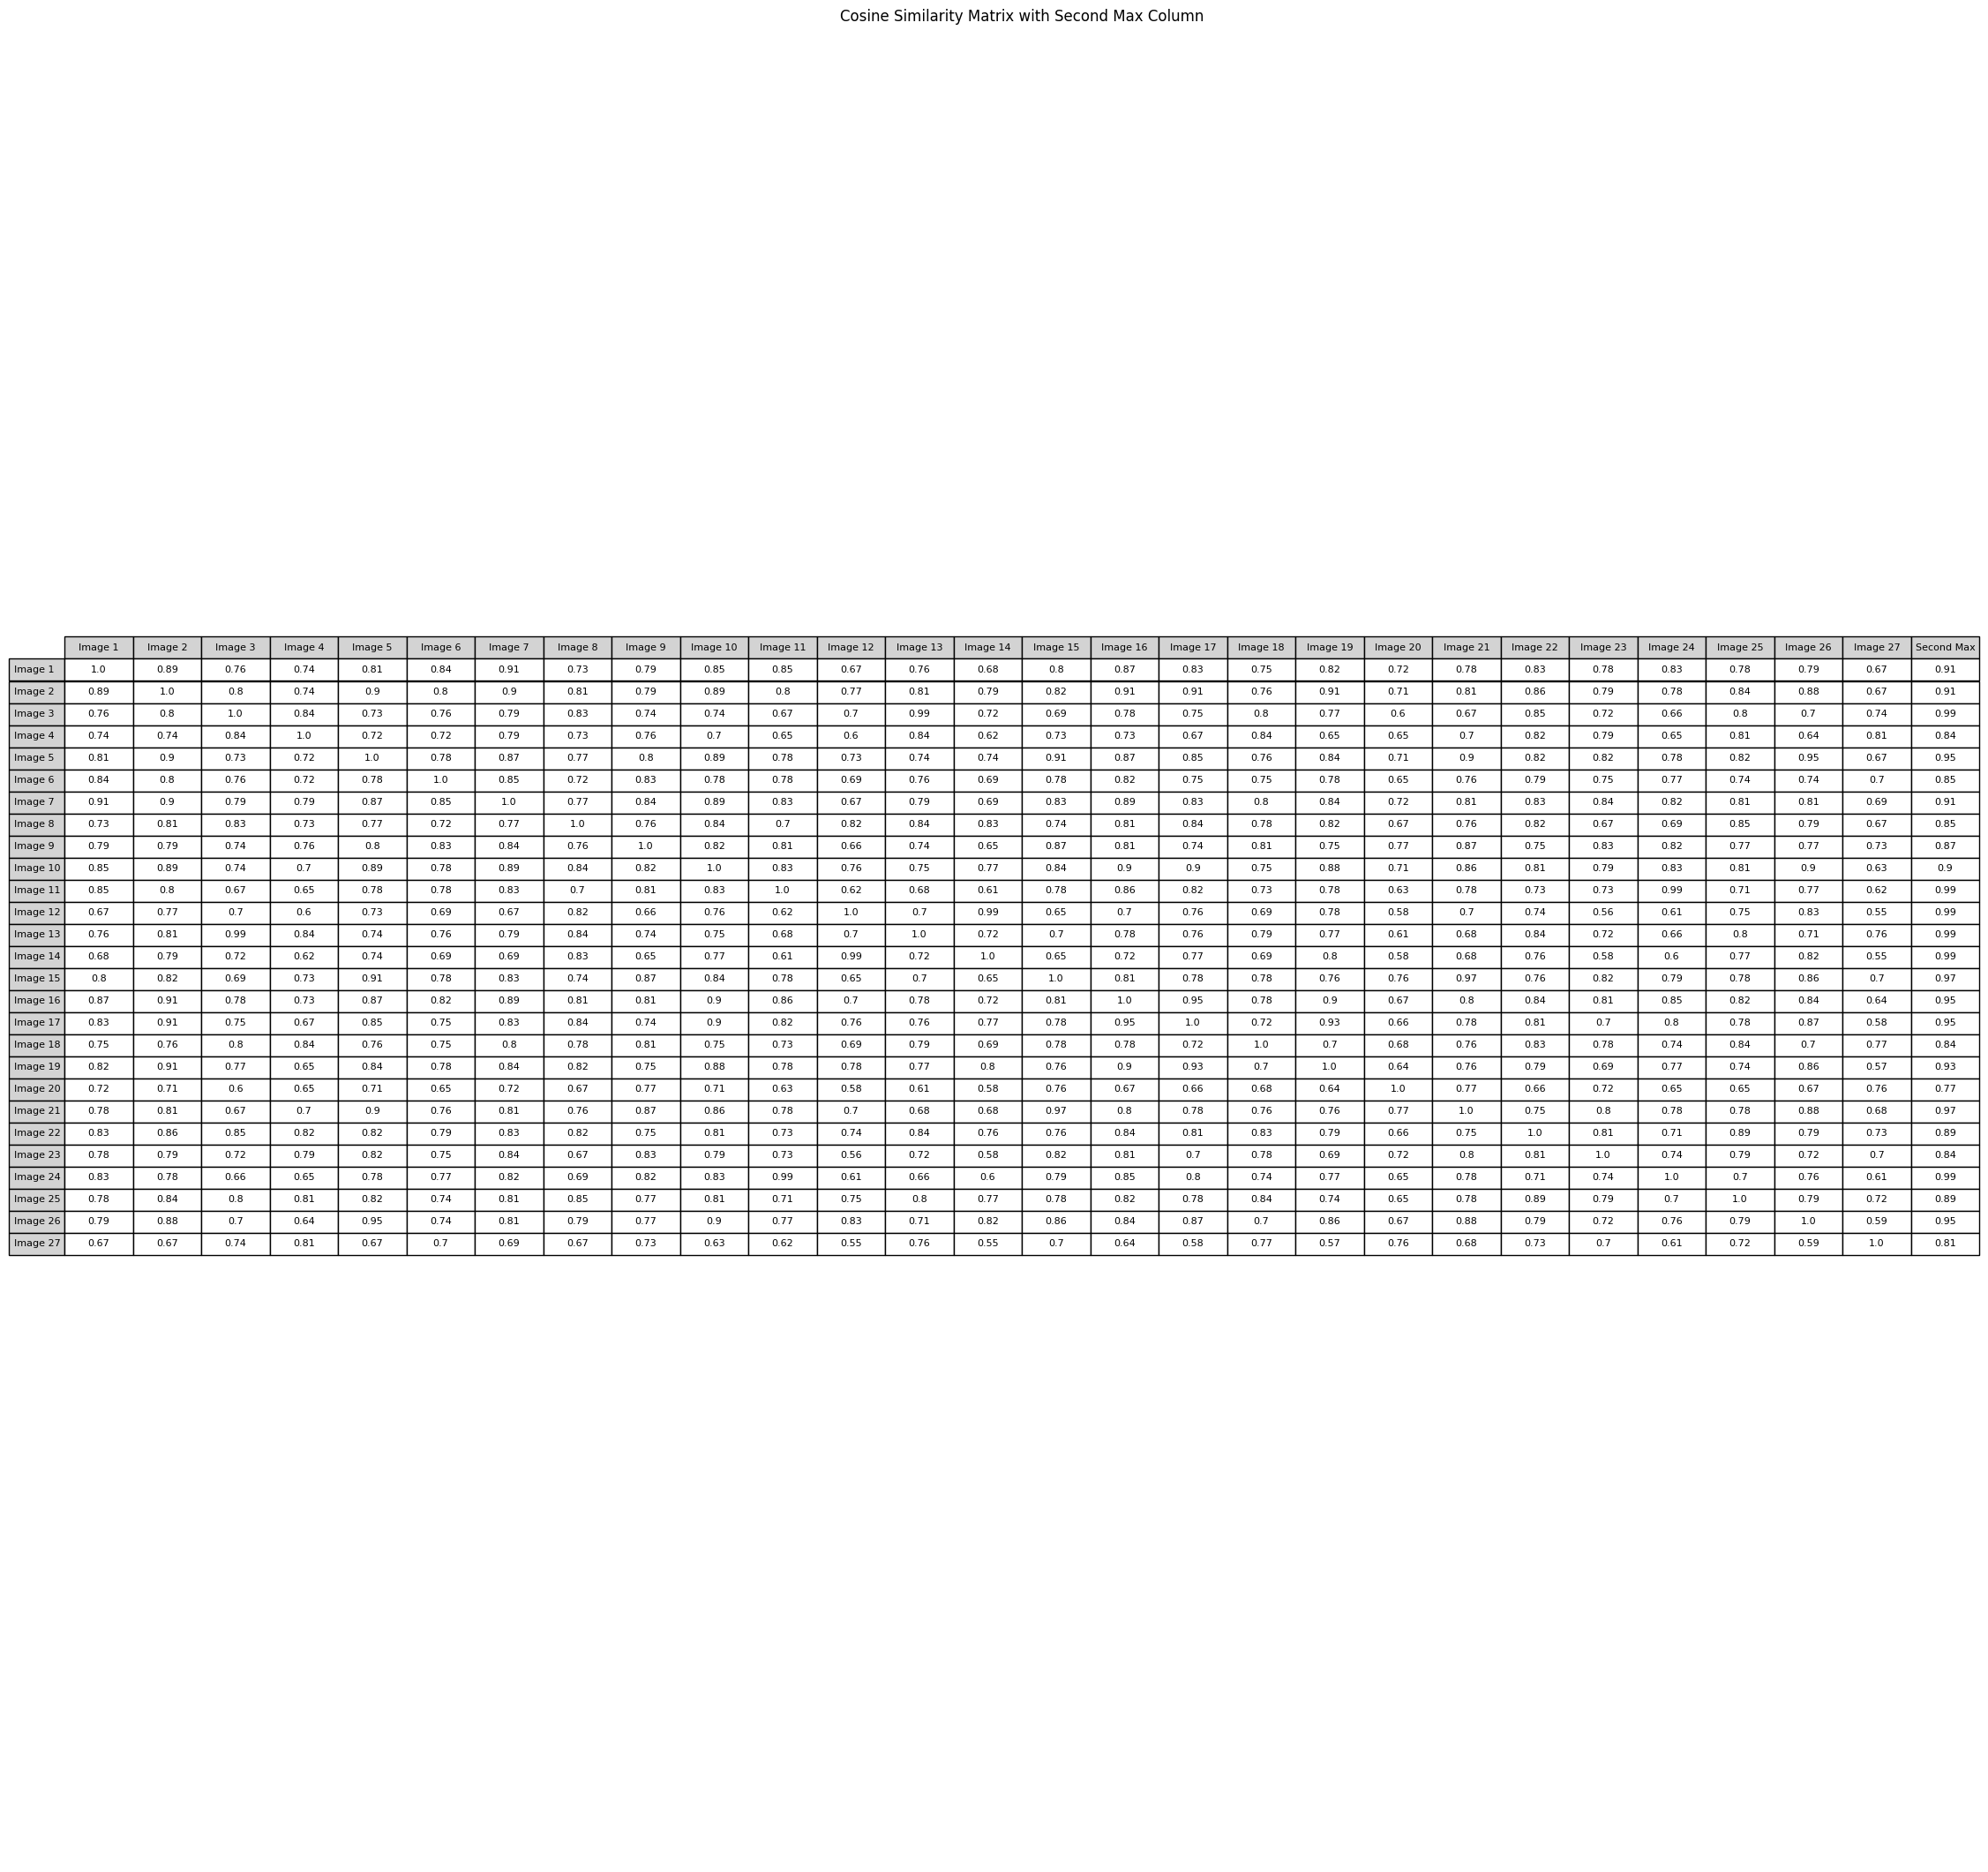

In [ ]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Main Imposter Detection Function
def imposter_detection(authorized_embedding, frames, window_size=30, decay_factor=0.9):
    similarity_scores = deque(maxlen=window_size)  # Create a deque to maintain a fixed size window of similarity scores

    for frame in frames:  # Assuming frames is a list of video frames
        # Extract embedding for the current frame (placeholder)
        current_embedding = ...  # Replace with actual embedding extraction
        
        # Calculate similarity
        similarity = calculate_cosine_similarity(authorized_embedding, current_embedding)
        similarity_scores.append(similarity)  # Add the current similarity to the moving window

        # Calculate weighted average and standard deviation
        weighted_average = sum(similarity_scores) / len(similarity_scores)  # Calculate the average of the scores in the deque
        std_dev = np.std(similarity_scores)  # Calculate the standard deviation of the scores in the deque

        # Set dynamic threshold
        dynamic_threshold = weighted_average - (std_dev * decay_factor)

        # Check if similarity indicates an imposter
        if similarity < dynamic_threshold:
            print("Imposter detected!")  # Raise imposter flag
        else:
            print("Authorized user detected.")  # Authorized user remains

# Example usage
authorized_embedding = ...  # Replace with authorized user's embedding
frames = [...]  # Replace with actual video frames
imposter_detection(authorized_embedding, frames)


In [294]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Main Imposter Detection Function
def imposter_detection(authorized_embedding, frames, window_size=30, decay_factor=0.9, reverify_frames=5):
    similarity_scores = deque(maxlen=window_size)  # Maintain a moving window of similarity scores

    for frame in frames:  # Assuming frames is a list of video frames
        # Extract embedding for the current frame (placeholder)
        current_embedding = ...  # Replace with actual embedding extraction
        
        # Calculate similarity
        similarity = calculate_cosine_similarity(authorized_embedding, current_embedding)
        similarity_scores.append(similarity)  # Add the current similarity to the moving window

        # Calculate weighted average and standard deviation
        weighted_average = sum(similarity_scores) / len(similarity_scores)  # Average of scores in the deque
        std_dev = np.std(similarity_scores)  # Standard deviation of scores in the deque

        # Set dynamic threshold
        dynamic_threshold = weighted_average - (std_dev * decay_factor)

        # Check for potential dip in similarity
        # if similarity < dynamic_threshold:
        #     # Re-verify by checking the previous few frames
        #     recent_similarities = list(similarity_scores)[-reverify_frames:]
        #     if all(sim > dynamic_threshold for sim in recent_similarities):
        #         print("Imposter detected!")  # Raise imposter flag only if consistent dip
        #     else:
        #         print("Authorized user detected, but there was a dip in similarity.")
        # else:
        #     print("Authorized user detected.")  # Authorized user remains
        if similarity < dynamic_threshold:
            print("Imposter detected!")  # Raise imposter flag
        else:
            print("Authorized user detected.")  # Authorized user remains

# Example usage
authorized_embedding = ...  # Replace with authorized user's embedding
frames = [...]  # Replace with actual video frames
imposter_detection(authorized_embedding, frames)


TypeError: unsupported operand type(s) for *: 'ellipsis' and 'ellipsis'

In [4]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity (for example purposes)
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Main Imposter Detection Function
def imposter_detection(similarity_scores, window_size=30, decay_factor=0.9, reverify_frames=5):
    # Maintain a deque for the moving window of similarity scores
    score_window = deque(maxlen=window_size)

    # Process the similarity scores
    for similarity in similarity_scores:
        score_window.append(similarity)  # Add current similarity to the moving window

        # Calculate weighted average and standard deviation
        if len(score_window) < 4:
            continue  # Ensure there are enough scores to calculate stats

        weighted_average = sum(score_window) / len(score_window)  # Average of scores in the deque
        std_dev = np.std(score_window)  # Standard deviation of scores in the deque

        # Set dynamic threshold
        dynamic_threshold = weighted_average - (std_dev * decay_factor)
        print(dynamic_threshold)

        # Check if the current similarity indicates an imposter
        # if similarity < dynamic_threshold:
        #     # Re-verify by checking the previous few frames
        #     recent_similarities = list(score_window)[-reverify_frames:]
        #     if all(sim > dynamic_threshold for sim in recent_similarities):
        #         print(f"Imposter detected at score {similarity:.4f}!")  # Raise imposter flag only if consistent dip
        #     else:
        #         print(f"Authorized user detected, but there was a dip in similarity: {similarity:.4f}.")
        # else:
        #     print(f"Authorized user detected with similarity score: {similarity:.4f}.")  # Authorized user remains

        if similarity < dynamic_threshold:
            print("Imposter detected!")  # Raise imposter flag
        else:
            print("Authorized user detected.")  # Authorized user remains

# Example usage
# Simulated similarity scores (you can replace these with your actual scores)
similarity_scores = [0.95, 0.93, 0.94, 0.88, 0.2,0.2,0.2, 0.2,0.2,0.2,0.2,0.7, 0.2,0.2,0.2,0.2,0.91, 0.85, 0.75, 0.80, 0.92, 0.78, 
                     0.76, 0.74, 0.90, 0.89, 0.70, 0.88, 0.82, 0.84, 0.79, 0.91]

imposter_detection(similarity_scores, window_size=4)


0.9007667583678947
Imposter detected!
0.4574585968111144
Imposter detected!
0.23493008576250096
Imposter detected!
0.10499622644196177
Authorized user detected.
0.2
Authorized user detected.
0.2
Authorized user detected.
0.2
Authorized user detected.
0.2
Authorized user detected.
0.13014428414850132
Authorized user detected.
0.13014428414850132
Authorized user detected.
0.13014428414850127
Authorized user detected.
0.13014428414850127
Authorized user detected.
0.2
Authorized user detected.
0.10080488349087191
Authorized user detected.
0.2334049902558752
Authorized user detected.
0.4241076411965033
Authorized user detected.
0.7741128526703289
Authorized user detected.
0.7734358770951056
Authorized user detected.
0.7543907279343477
Authorized user detected.
0.7589754518090507
Authorized user detected.
0.7363603896932107
Authorized user detected.
0.7389754518090508
Authorized user detected.
0.7568632153438333
Authorized user detected.
0.7276646225035543
Imposter detected!
0.76818184945788

In [3]:
len(similarity_scores)

32

In [288]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity (for example purposes)
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Main Imposter Detection Function
def imposter_detection(similarity_scores, window_size=30, decay_factor=0.9, reverify_frames=5):
    # Maintain a deque for the moving window of similarity scores
    score_window = deque(maxlen=window_size)

    # Process the similarity scores
    for similarity in similarity_scores:
        score_window.append(similarity)  # Add current similarity to the moving window

        # Calculate weighted average and standard deviation
        if len(score_window) < 2:
            continue  # Ensure there are enough scores to calculate stats

        weighted_average = sum(score_window) / len(score_window)  # Average of scores in the deque
        std_dev = np.std(score_window)  # Standard deviation of scores in the deque
        # print(weighted_average, std_dev)

        # Set dynamic threshold
        dynamic_threshold = weighted_average - (std_dev * decay_factor)
        # print(dynamic_threshold)

        if similarity < dynamic_threshold:
            # Re-verify by checking the previous few frames
            recent_similarities = list(score_window)[-reverify_frames:]
            if all(sim > dynamic_threshold for sim in recent_similarities):
                print(f"Imposter detected at score {similarity:.4f}!")  # Raise imposter flag only if consistent dip
            else:
                print(f"Authorized user detected, but there was a dip in similarity: {similarity:.4f}.")
        else:
            print(f"Authorized user detected with similarity score: {similarity:.4f}.")  # Authorized user remains

# similarity_scores = [0.95, 0.93, 0.94, 0.88, 0.6, 0.7, 0.91, 0.85, 0.75, 0.80, 0.92, 0.78, 
#                      0.76, 0.74, 0.90, 0.89, 0.70, 0.88, 0.82, 0.84, 0.79, 0.91]

float_values = [float(value) for value in results]
# Shuffle the float values randomly
import random
random.shuffle(float_values)
similarity_scores= float_values

imposter_detection(similarity_scores)


Authorized user detected, but there was a dip in similarity: 0.8722.
Authorized user detected with similarity score: 0.8846.
Authorized user detected with similarity score: 0.9023.
Authorized user detected with similarity score: 0.9024.
Authorized user detected with similarity score: 0.9171.
Authorized user detected with similarity score: 0.9283.
Authorized user detected with similarity score: 0.8916.
Authorized user detected with similarity score: 0.9023.
Authorized user detected with similarity score: 0.9024.
Authorized user detected, but there was a dip in similarity: 0.8012.
Authorized user detected with similarity score: 0.9041.
Authorized user detected with similarity score: 0.9042.
Authorized user detected with similarity score: 0.8861.
Authorized user detected with similarity score: 0.9089.
Authorized user detected, but there was a dip in similarity: 0.7591.
Authorized user detected with similarity score: 0.8903.
Authorized user detected with similarity score: 0.9147.
Authorize

In [283]:
len(similarity_scores)

6758

In [ ]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Imposter Detection Function using Dynamic Threshold Adaptation Across Slots
def imposter_detection_across_slots(authorized_embedding, slots, window_size=3, decay_factor=0.9):
    # History deque to keep track of slot-level statistics for the moving window
    slot_averages = deque(maxlen=window_size)
    slot_std_devs = deque(maxlen=window_size)

    for idx, slot_frames in enumerate(slots):
        similarities = [calculate_cosine_similarity(authorized_embedding, frame_embedding) for frame_embedding in slot_frames]
        slot_average = np.mean(similarities)
        slot_std_dev = np.std(similarities)

        # Add slot statistics to the history
        slot_averages.append(slot_average)
        slot_std_devs.append(slot_std_dev)

        # Calculate the dynamic threshold based on the historical averages and std deviations
        if len(slot_averages) >= window_size:
            historical_average = np.mean(slot_averages)
            historical_std_dev = np.mean(slot_std_devs)
            dynamic_threshold = historical_average - (historical_std_dev * decay_factor)
        else:
            # Use the current slot's average and std deviation if the history isn't full yet
            dynamic_threshold = slot_average - (slot_std_dev * decay_factor)

        # Check if the entire slot indicates an imposter
        if all(similarity < dynamic_threshold for similarity in similarities):
            print(f"Imposter detected for slot {idx + 1}!")
        else:
            print(f"Authorized user detected for slot {idx + 1}.")

# Example usage
authorized_embedding = np.array([0.5, 0.2, 0.1, 0.9])  # Placeholder authorized user embedding
slot1_frames = [np.array([0.4, 0.1, 0.1, 0.8]), np.array([0.3, 0.2, 0.1, 0.85]), np.array([0.45, 0.15, 0.05, 0.8])]
slot2_frames = [np.array([0.1, 0.05, 0.02, 0.4]), np.array([0.15, 0.1, 0.05, 0.3]), np.array([0.12, 0.08, 0.04, 0.35])]
slot3_frames = [np.array([0.5, 0.3, 0.2, 0.7]), np.array([0.48, 0.32, 0.25, 0.75]), np.array([0.46, 0.29, 0.21, 0.68])]

# List of slots
slots = [slot1_frames, slot2_frames, slot3_frames]

# Detect imposter across slots
imposter_detection_across_slots(authorized_embedding, slots)


In [ ]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Function to check environmental changes (e.g., lighting conditions based on frame statistics)
def check_environmental_change(current_slot, previous_slot):
    # Placeholder logic for environmental change detection (use frame brightness, etc.)
    # This could be a function calculating average pixel intensity changes, contrast variation, etc.
    current_brightness = np.mean([np.mean(frame) for frame in current_slot])
    previous_brightness = np.mean([np.mean(frame) for frame in previous_slot])
    # Consider a change significant if brightness varies beyond a threshold (e.g., 20%)
    return abs(current_brightness - previous_brightness) > 0.2 * previous_brightness

# Imposter Detection Function with Environmental Adaptation
def imposter_detection_across_slots(authorized_embedding, slots, window_size=3, decay_factor=0.9):
    slot_averages = deque(maxlen=window_size)
    slot_std_devs = deque(maxlen=window_size)

    previous_slot = None

    for idx, slot_frames in enumerate(slots):
        similarities = [calculate_cosine_similarity(authorized_embedding, frame_embedding) for frame_embedding in slot_frames]
        slot_average = np.mean(similarities)
        slot_std_dev = np.std(similarities)

        # Check for environmental changes if we have a previous slot
        if previous_slot and check_environmental_change(slot_frames, previous_slot):
            print(f"Environmental change detected for slot {idx + 1}. Adjusting threshold.")

            # Adjust the decay factor or apply a lower penalty for similarity dip due to environment
            decay_factor = 0.5  # Example of making the decay less aggressive if lighting changed

        # Add slot statistics to the history
        slot_averages.append(slot_average)
        slot_std_devs.append(slot_std_dev)

        # Calculate the dynamic threshold based on the historical averages and std deviations
        if len(slot_averages) >= window_size:
            historical_average = np.mean(slot_averages)
            historical_std_dev = np.mean(slot_std_devs)
            dynamic_threshold = historical_average - (historical_std_dev * decay_factor)
        else:
            # Use the current slot's average and std deviation if the history isn't full yet
            dynamic_threshold = slot_average - (slot_std_dev * decay_factor)

        # Check if the entire slot indicates an imposter
        if all(similarity < dynamic_threshold for similarity in similarities):
            print(f"Imposter detected for slot {idx + 1}!")
        else:
            print(f"Authorized user detected for slot {idx + 1}.")

        # Update the previous slot for the next iteration
        previous_slot = slot_frames

# Example usage
authorized_embedding = np.array([0.5, 0.2, 0.1, 0.9])  # Placeholder authorized user embedding
slot1_frames = [np.array([0.4, 0.1, 0.1, 0.8]), np.array([0.3, 0.2, 0.1, 0.85]), np.array([0.45, 0.15, 0.05, 0.8])]
slot2_frames = [np.array([0.1, 0.05, 0.02, 0.4]), np.array([0.15, 0.1, 0.05, 0.3]), np.array([0.12, 0.08, 0.04, 0.35])]
slot3_frames = [np.array([0.5, 0.3, 0.2, 0.7]), np.array([0.48, 0.32, 0.25, 0.75]), np.array([0.46, 0.29, 0.21, 0.68])]

# List of slots
slots = [slot1_frames, slot2_frames, slot3_frames]

# Detect imposter across slots
imposter_detection_across_slots(authorized_embedding, slots)

In [6]:
import numpy as np

def weighted_average_similarity(similarities, sigma=1.0):
    """
    Calculate the weighted average of similarity scores using Gaussian weights.
    
    Args:
    - similarities (list): List of similarity scores for a given time slot.
    - sigma (float): Standard deviation of the Gaussian distribution.
    
    Returns:
    - float: Weighted average similarity score.
    """
    # Number of frames in the slot
    n = len(similarities)
    
    # Generate Gaussian weights centered around the middle frame
    middle = n // 2
    indices = np.arange(n)
    gaussian_weights = np.exp(-0.5 * ((indices - middle) / sigma) ** 2)
    
    # Normalize the weights so they sum to 1
    gaussian_weights /= np.sum(gaussian_weights)
    
    # Calculate the weighted average similarity
    weighted_avg = np.sum(gaussian_weights * np.array(similarities))
    
    return weighted_avg

# Example usage
similarities = [0.95, 0.93, 0.94, 0.88, 0.92]  # Example similarity scores for a time slot
weighted_avg_similarity = weighted_average_similarity(similarities, sigma=1.0)
print(f"Weighted average similarity: {weighted_avg_similarity:.4f}")
general_avg = sum(similarities)/ len(similarities)
print("General:", general_avg)

Weighted average similarity: 0.9224
General: 0.924


In [11]:
def linear_weighted_average(similarities):
    """
    Calculate the weighted average of similarity scores using linearly decaying weights.
    
    Args:
    - similarities (list): List of similarity scores for a given time slot.
    
    Returns:
    - float: Weighted average similarity score.
    """
    # Number of frames in the slot
    n = len(similarities)
    
    # Generate linearly decaying weights
    weights = np.linspace(1, 0.1, n)  # Weight range from 1 (nearest) to 0.1 (farthest)
    print(weights)
    
    # Normalize the weights so they sum to 1
    weights /= np.sum(weights)
    print(weights)
    
    # Calculate the weighted average similarity
    weighted_avg = np.sum(weights * np.array(similarities))
    print(weights * np.array(similarities))
    
    return weighted_avg

# Example usage
linear_weighted_avg_similarity = linear_weighted_average(similarities)
print(f"Linear weighted average similarity: {linear_weighted_avg_similarity:.4f}")


[1.    0.775 0.55  0.325 0.1  ]
[0.36363636 0.28181818 0.2        0.11818182 0.03636364]
[0.34545455 0.26209091 0.188      0.104      0.03345455]
Linear weighted average similarity: 0.9330


In [8]:
weights

NameError: name 'weights' is not defined

In [13]:
import numpy as np
from collections import deque

# Function to calculate cosine similarity
def calculate_cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Imposter Detection Function using Dynamic Threshold Adaptation Across Slots
def imposter_detection_across_slots(authorized_embedding, slots, window_size=3, decay_factor=0.9):
    # History deque to keep track of slot-level statistics for the moving window
    slot_averages = deque(maxlen=window_size)
    slot_std_devs = deque(maxlen=window_size)

    for idx, slot_frames in enumerate(slots):
        similarities = [calculate_cosine_similarity(authorized_embedding, frame_embedding) for frame_embedding in slot_frames]
        slot_average = np.mean(similarities)
        slot_std_dev = np.std(similarities)

        # Add slot statistics to the history
        slot_averages.append(slot_average)
        slot_std_devs.append(slot_std_dev)

        # Calculate the dynamic threshold based on the historical averages and std deviations
        if len(slot_averages) >= window_size:
            historical_average = np.mean(slot_averages)
            historical_std_dev = np.mean(slot_std_devs)
            dynamic_threshold = historical_average - (historical_std_dev * decay_factor)
        else:
            # Use the current slot's average and std deviation if the history isn't full yet
            dynamic_threshold = slot_average - (slot_std_dev * decay_factor)
        print(dynamic_threshold)
        # Check if the entire slot indicates an imposter
        if all(similarity < dynamic_threshold for similarity in similarities):
            print(f"Imposter detected for slot {idx + 1}!")
        else:
            print(f"Authorized user detected for slot {idx + 1}.")

# Example usage
authorized_embedding = np.array([0.5, 0.2, 0.1, 0.9])  # Placeholder authorized user embedding
slot1_frames = [np.array([0.4, 0.1, 0.1, 0.8]), np.array([0.3, 0.2, 0.1, 0.85]), np.array([0.45, 0.15, 0.05, 0.8])]
slot2_frames = [np.array([0.1, 0.05, 0.02, 0.4]), np.array([0.15, 0.1, 0.05, 0.3]), np.array([0.12, 0.08, 0.04, 0.35])]
slot3_frames = [np.array([0.5, 0.3, 0.2, 0.7]), np.array([0.48, 0.32, 0.25, 0.75]), np.array([0.46, 0.29, 0.21, 0.68])]

# List of slots
slots = [slot1_frames, slot2_frames, slot3_frames]

# Detect imposter across slots
imposter_detection_across_slots(authorized_embedding, slots)


0.9887864356214292
Authorized user detected for slot 1.
0.9691190079079394
Authorized user detected for slot 2.
0.9774152386902577
Imposter detected for slot 3!
